In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("assets/csv/Groceries_dataset.csv")  # import data from csv
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.dtypes  # check data types

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # convert date to datetime
print(df.head())
df.dtypes  # check data types

   Member_number       Date   itemDescription
0           1808 2015-07-21    tropical fruit
1           2552 2015-01-05        whole milk
2           2300 2015-09-19         pip fruit
3           1187 2015-12-12  other vegetables
4           3037 2015-02-01        whole milk


Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [5]:
print(df.itemDescription.value_counts().sort_values(ascending=True).head())
df.itemDescription.value_counts().sort_values(ascending=True).tail()  # find frequency of most common items

preservation products    1
kitchen utensil          1
baby cosmetics           3
bags                     4
frozen chicken           5
Name: itemDescription, dtype: int64


yogurt              1334
soda                1514
rolls/buns          1716
other vegetables    1898
whole milk          2502
Name: itemDescription, dtype: int64

In [6]:
(df['Date'].max()-df['Date'].min())/np.timedelta64(1,'Y')  # find time span of data

1.9931963010876335

In [7]:
df['itemIndex'] = df.groupby('itemDescription').ngroup()  # create index for items
df.sort_values(by=['Date'], inplace=True, ignore_index=True)  # sort by date
print(df.head())

   Member_number       Date        itemDescription  itemIndex
0           2226 2014-01-01          bottled water         12
1           1789 2014-01-01                candles         18
2           2610 2014-01-01          domestic eggs         49
3           3681 2014-01-01                 dishes         47
4           3942 2014-01-01  Instant food products          0


In [8]:
dates = pd.Series(df['Date'].unique())  # get unique date values
dates.name = "Date"
print(dates.dtype)
items = df['itemDescription'].unique()  # get unique item description values
print(items.dtype)

datetime64[ns]
object


In [9]:
data_series = []
for item in items:
    item_dates = df[df["itemDescription"] == item].Date.value_counts()
    item_dates.name = item

    data_series.append(item_dates)
data_series[0]

2014-07-17    6
2014-06-07    5
2014-10-13    5
2014-12-26    5
2014-11-03    5
             ..
2015-04-13    1
2014-06-14    1
2014-06-10    1
2015-04-16    1
2015-12-30    1
Name: bottled water, Length: 510, dtype: int64

In [10]:
data_frames = [s.to_frame() for s in data_series]
df_date_item_no= pd.concat(data_frames, axis=1)  # create dataframe with item counts
df_date_item_no = df_date_item_no.rename_axis('date', axis=1)  # rename index
df_date_item_no.head()

date,bottled water,candles,domestic eggs,dishes,Instant food products,tropical fruit,shopping bags,butter,other vegetables,whole milk,...,ready soups,organic products,skin care,frozen fruits,cream,frozen chicken,cooking chocolate,bathroom cleaner,flower soil/fertilizer,kitchen utensil
2014-01-01,4.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,2.0,1.0,NaN,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-04,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-05,3.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_date_item_no.fillna(0, inplace=True)  # fill NaN values with 0
df_date_item_no.to_csv("assets/csv/df_date_item_no.csv")  # save to csv
df_date_item_no.head()

date,bottled water,candles,domestic eggs,dishes,Instant food products,tropical fruit,shopping bags,butter,other vegetables,whole milk,...,ready soups,organic products,skin care,frozen fruits,cream,frozen chicken,cooking chocolate,bathroom cleaner,flower soil/fertilizer,kitchen utensil
2014-01-01,4.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-02,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-03,0.0,0.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-04,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-05,3.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_date_item_no = pd.read_csv("assets/csv/df_date_item_no.csv", index_col=0)  # import data from csv
df_date_item_no = df_date_item_no.rename_axis('date', axis=1)
# change the datatype of the index to datetime
df_date_item_no.index = pd.to_datetime(df_date_item_no.index, format='%Y-%m-%d')

In [13]:
import re
# Enter Item name and order cycle
item_find = 'whole milk'
order_cycle = '2d'
#regex to find only digits
d = int(re.findall(r'\d+', order_cycle)[0])
num_pred = 365//d

<Axes: >

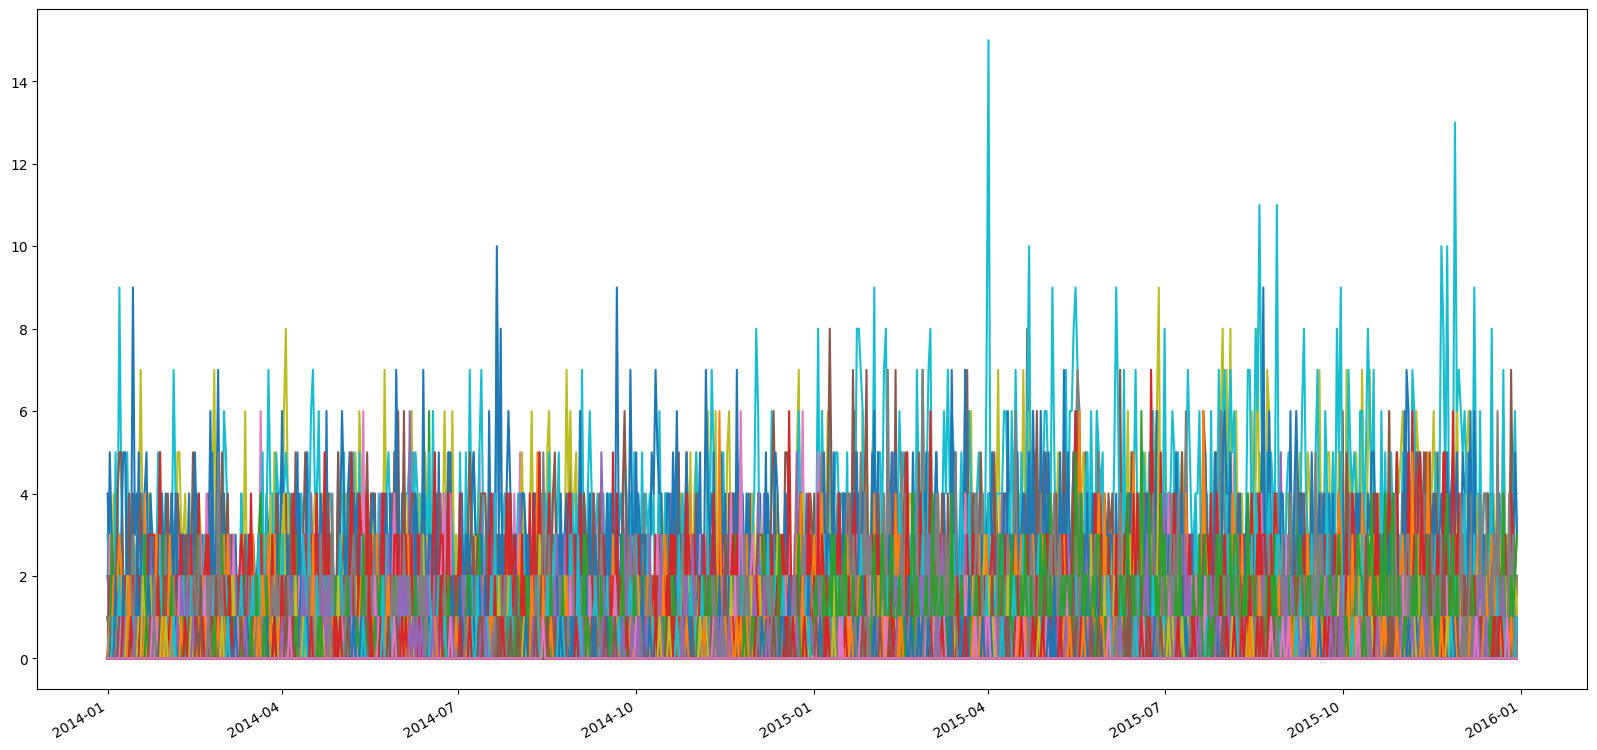

In [14]:
df_date_item_no.plot(legend=False, figsize=(20,10))  # plot all items

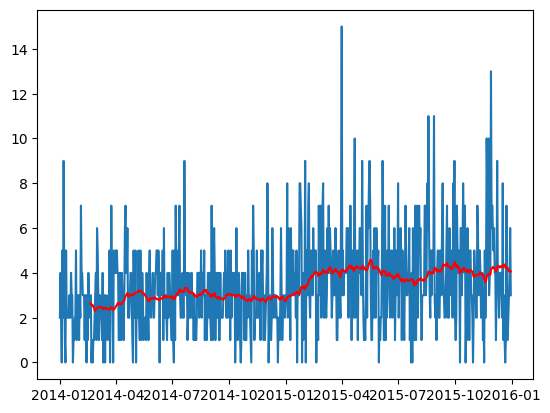

In [15]:
plt.plot(df_date_item_no[item_find])  # plot item
plt.plot(df_date_item_no[item_find].rolling(window=50).mean(), color='red')

In [16]:
df_resampled = df_date_item_no[[item_find,]].resample(order_cycle).sum()  # resample data to order cycle
print(df_resampled.head())
len(df_resampled)

date        whole milk
2014-01-01         6.0
2014-01-03         2.0
2014-01-05         7.0
2014-01-07        13.0
2014-01-09         1.0


365

In [17]:
#create a test train split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_resampled, test_size=0.2, shuffle=False)
len_train = len(train)
len_test = len(test)
print(f"Training Columns: {len_train}\nTesting Columns: {len_test}")

Training Columns: 292
Testing Columns: 73


In [18]:
import random
import warnings
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")
# define the parameter space
PARAMETER_SPACE = {
    'p': range(1, 5),
    'd': range(1, 5),
    'q': range(1, 5)
}

def objective_function(params):
    p, d, q = params['p'], params['d'], params['q']
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit()

    forecast_order = model_fit.forecast(steps=len_test)
    mse = mean_squared_error(test, forecast_order)
    return mse

In [19]:
def genetic_algorithm(population_size, generations):
    # initialize the population with random individuals
    population = []
    for i in range(population_size):
        individual = {}
        for param, values in PARAMETER_SPACE.items():
            individual[param] = random.choice(values)
        population.append(individual)
    print("Printing best of each Generation")
    # run the genetic algorithm for the specified number of generations
    for gen in range(generations):
        fitness = np.array([objective_function(individual) for individual in population])

        probabilities = fitness / fitness.sum()
        parents = np.random.choice(population, size=population_size // 2, replace=False, p=probabilities)

        # generate offspring by crossover and mutation
        offspring = []
        for parent1, parent2 in zip(parents[::2], parents[1::2]):
            child = {}
            for param in PARAMETER_SPACE.keys():
                if random.random() < 0.5:
                    child[param] = parent1[param]
                else:
                    child[param] = parent2[param]
                if random.random() < 0.3:
                    child[param] = random.choice(PARAMETER_SPACE[param])
            offspring.append(child)

        population = sorted(population + offspring, key=objective_function)[:population_size]
        print(f'Generation {gen + 1}: {population[0]} (fitness: {objective_function(population[0])})')

    best_individual = sorted(population, key=objective_function)[0]
    return best_individual

In [21]:
ga = genetic_algorithm(6, 6)
ideal_order = tuple(ga.values())
ideal_order

Printing best of each Generation
Generation 1: {'p': 3, 'd': 3, 'q': 3} (fitness: 12.980389197739814)
Generation 2: {'p': 3, 'd': 3, 'q': 3} (fitness: 12.980389197739814)
Generation 3: {'p': 3, 'd': 3, 'q': 3} (fitness: 12.980389197739814)
Generation 4: {'p': 3, 'd': 3, 'q': 3} (fitness: 12.980389197739814)
Generation 5: {'p': 3, 'd': 3, 'q': 3} (fitness: 12.980389197739814)
Generation 6: {'p': 3, 'd': 3, 'q': 3} (fitness: 12.980389197739814)


(3, 3, 3)

In [22]:
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
order_dict = {}
min_error = np.inf
try:
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                model_order_find = ARIMA(train, order=order).fit()
                forecast_order = model_order_find.forecast(steps=len_test)
                error = mean_squared_error(test, forecast_order)
                if error < min_error:
                    min_error = error
                order_dict[order] = error
                if (order[0] + order[1] + order[2]) % 4 == 0:
                    print(f"Order: {order} Error: {round(error,3)}")
except:
    pass
ideal_order_actual = (list(order_dict.keys())[list(order_dict.values()).index(min(order_dict.values(), ))])
print(f"Best Order: {ideal_order_actual} ({min_error})")

Order: (0, 0, 0) Error: 15.489
Order: (0, 0, 4) Error: 15.501
Order: (0, 1, 3) Error: 13.192
Order: (0, 2, 2) Error: 13.271
Order: (0, 3, 1) Error: 15057.655
Order: (0, 4, 0) Error: 259700336108.336
Order: (0, 4, 4) Error: 276.664
Order: (1, 0, 3) Error: 13.742
Order: (1, 1, 2) Error: 13.209
Order: (1, 2, 1) Error: 19.704
Order: (1, 3, 0) Error: 29328.07
Order: (1, 3, 4) Error: 14.067
Order: (1, 4, 3) Error: 1157.453
Order: (2, 0, 2) Error: 13.74
Order: (2, 1, 1) Error: 13.192
Order: (2, 2, 0) Error: 278.432
Order: (2, 2, 4) Error: 13.301
Order: (2, 3, 3) Error: 532.861
Order: (2, 4, 2) Error: 107.505
Order: (3, 0, 1) Error: 15.525
Order: (3, 1, 0) Error: 16.453
Order: (3, 1, 4) Error: 13.378
Order: (3, 2, 3) Error: 13.223
Order: (3, 3, 2) Error: 593.804
Order: (3, 4, 1) Error: 1872739.876
Best Order: (3, 3, 3) (12.980389197739814)


In [23]:
if not (ideal_order_actual == ideal_order):
    print("Genetic Algorithm did not give Optimal Result")
else:
    print("Genetic Algorithm gave Optimal Result")

Genetic Algorithm gave Optimal Result


In [24]:
#sample parameters
model = ARIMA(train, order=ideal_order)  # create model (p,d,q)
model_ideal = ARIMA(train, order=ideal_order_actual)
results = model.fit()  # fit model
results_ideal = model_ideal.fit()
# Make predictions for the test set
forecast = results.forecast(steps=len_test)
forecast_ideal = results_ideal.forecast(steps=len_test)

print(forecast.head())
print(forecast_ideal.head())


2015-08-08    9.207176
2015-08-10    9.818069
2015-08-12    9.313327
2015-08-14    9.321376
2015-08-16    9.361520
Freq: 2D, Name: predicted_mean, dtype: float64
2015-08-08    9.207176
2015-08-10    9.818069
2015-08-12    9.313327
2015-08-14    9.321376
2015-08-16    9.361520
Freq: 2D, Name: predicted_mean, dtype: float64


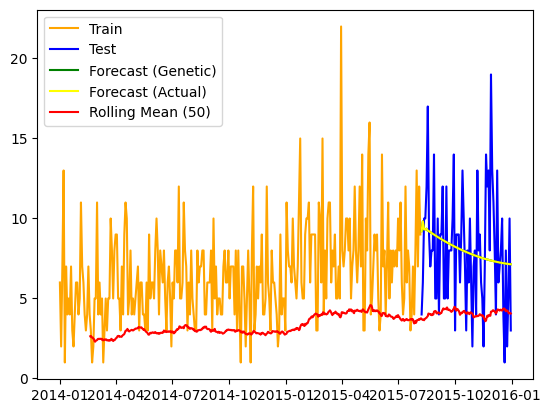

In [25]:
plt.plot(train.index, train, label='Train', color='orange')
plt.plot(test.index, test, label='Test', color = 'blue')
plt.plot(forecast.index, forecast, label='Forecast (Genetic)', color='green')
plt.plot(forecast_ideal.index, forecast_ideal, label='Forecast (Actual)', color='yellow')
plt.plot(df_date_item_no[item_find].rolling(window=50).mean(), color='red', label='Rolling Mean (50)')

plt.legend()
plt.show()  # plot Test, Train and Forecast results

2016-12-20    15.879442
2016-12-22    15.980662
2016-12-24    16.096238
2016-12-26    16.198780
2016-12-28    16.315670
Freq: 2D, Name: predicted_mean, dtype: float64
2016-12-20    15.879442
2016-12-22    15.980662
2016-12-24    16.096238
2016-12-26    16.198780
2016-12-28    16.315670
Freq: 2D, Name: predicted_mean, dtype: float64


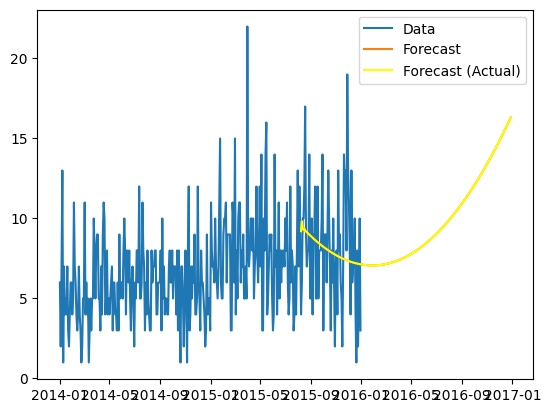

In [26]:
forecast_arima = results.forecast(steps=num_pred+len_test)
forecast_arima_ideal = results_ideal.forecast(steps=num_pred+len_test)
print(forecast_arima.tail())
print(forecast_arima_ideal.tail())
plt.plot(df_resampled.index, df_resampled, label='Data')
plt.plot(forecast_arima.index, forecast_arima, label='Forecast',)
plt.plot(forecast_arima_ideal.index, forecast_arima_ideal, label='Forecast (Actual)', color='yellow')
plt.legend()
plt.show()  # plot Given Data and Forecast results for the next 26 order cycles

In [27]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)

print("For Genetic Algorithm")
print(f"MAE: {round(mae,3)}")
print(f"RMSE: {round(rmse,3)}")
print(f"MAPE: {round(mape,3)}%")

mae_ideal = mean_absolute_error(test, forecast_ideal)
rmse_ideal = np.sqrt(mean_squared_error(test, forecast_ideal))
mape_ideal = mean_absolute_percentage_error(test, forecast_ideal)
print("\n\nFor Ideal Order")
print(f"MAE: {round(mae_ideal,3)}")
print(f"RMSE: {round(rmse_ideal,3)}")
print(f"MAPE: {round(mape_ideal,3)}%")


For Genetic Algorithm
MAE: 2.816
RMSE: 3.603
MAPE: 0.553%


For Ideal Order
MAE: 2.816
RMSE: 3.603
MAPE: 0.553%


In [28]:
df_item = pd.DataFrame({'ds':df_resampled.index, 'y':df_resampled[item_find].values})  # create dataframe for prophet (only accepts date as ds and value as y)
df_item.head()

,ds,y
0,2014-01-01,6.0
1,2014-01-03,2.0
2,2014-01-05,7.0
3,2014-01-07,13.0
4,2014-01-09,1.0


In [29]:
from prophet import Prophet  #Prophet by Facebook

model = Prophet()
# Fit the model
model.fit(df_item)

# create date to predict
future_dates = model.make_future_dataframe(periods=num_pred, freq=order_cycle)

# Make predictions
predictions = model.predict(future_dates)

predictions.tail()

15:09:31 - cmdstanpy - INFO - Chain [1] start processing
15:09:31 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
542,2016-12-20,10.315485,7.375803,15.066028,10.311419,10.319441,0.860690,0.860690,0.860690,0.860690,0.860690,0.860690,0.0,0.0,0.0,11.176175
543,2016-12-22,10.325070,6.038113,13.474378,10.320982,10.329057,-0.514519,-0.514519,-0.514519,-0.514519,-0.514519,-0.514519,0.0,0.0,0.0,9.810551
544,2016-12-24,10.334656,6.413793,13.644340,10.330523,10.338672,-0.254862,-0.254862,-0.254862,-0.254862,-0.254862,-0.254862,0.0,0.0,0.0,10.079794
545,2016-12-26,10.344241,6.138804,13.683986,10.340063,10.348287,-0.341411,-0.341411,-0.341411,-0.341411,-0.341411,-0.341411,0.0,0.0,0.0,10.002830
546,2016-12-28,10.353827,6.391063,13.427499,10.349624,10.357899,-0.346103,-0.346103,-0.346103,-0.346103,-0.346103,-0.346103,0.0,0.0,0.0,10.007724


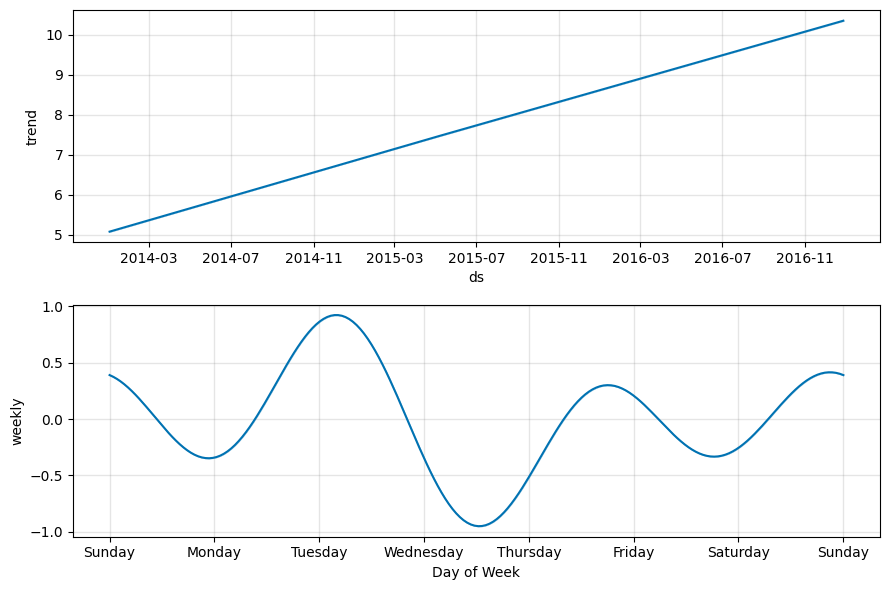

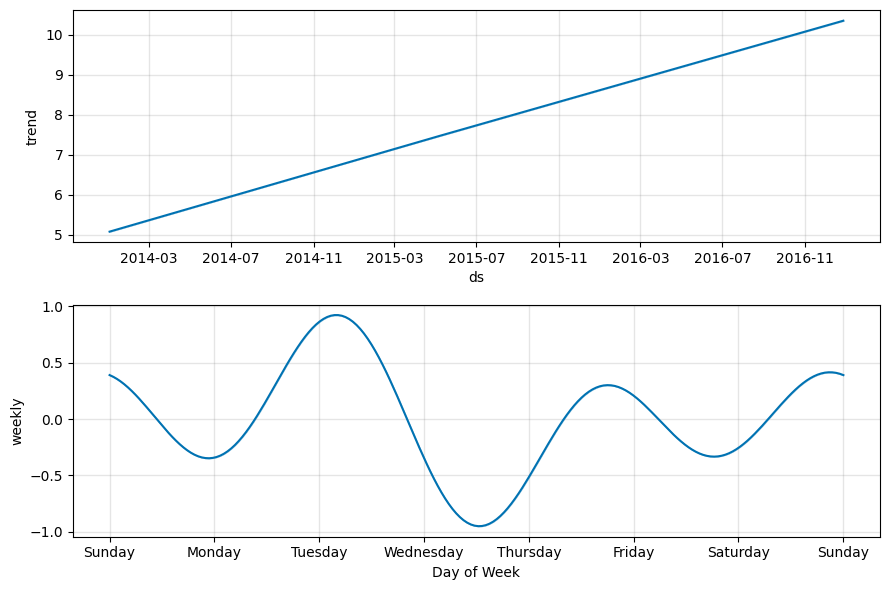

In [30]:
model.plot_components(predictions)

In [31]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(model, initial='365 days', horizon = '90 days')
res = performance_metrics(df_cv)
res

  0%|          | 0/7 [00:00<?, ?it/s]

15:09:32 - cmdstanpy - INFO - Chain [1] start processing
15:09:32 - cmdstanpy - INFO - Chain [1] done processing
15:09:33 - cmdstanpy - INFO - Chain [1] start processing
15:09:33 - cmdstanpy - INFO - Chain [1] done processing
15:09:33 - cmdstanpy - INFO - Chain [1] start processing
15:09:33 - cmdstanpy - INFO - Chain [1] done processing
15:09:33 - cmdstanpy - INFO - Chain [1] start processing
15:09:33 - cmdstanpy - INFO - Chain [1] done processing
15:09:33 - cmdstanpy - INFO - Chain [1] start processing
15:09:33 - cmdstanpy - INFO - Chain [1] done processing
15:09:33 - cmdstanpy - INFO - Chain [1] start processing
15:09:33 - cmdstanpy - INFO - Chain [1] done processing
15:09:34 - cmdstanpy - INFO - Chain [1] start processing
15:09:34 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,7.458115,2.730955,2.043374,0.314676,0.158026,0.271400,0.774194
1,10 days,5.098486,2.257983,1.739276,0.254965,0.148865,0.230971,0.806452
2,11 days,8.067604,2.840353,2.165460,0.295607,0.169023,0.272712,0.709677
3,12 days,8.051367,2.837493,2.166735,0.269330,0.258665,0.262859,0.709677
4,13 days,9.440761,3.072582,2.395609,0.355495,0.294084,0.307359,0.612903
...,...,...,...,...,...,...,...,...
77,86 days,17.884544,4.229012,2.773475,0.717838,0.178266,0.371984,0.693548
78,87 days,19.192799,4.380959,2.856353,0.687594,0.178266,0.364805,0.709677
79,88 days,18.491637,4.300190,2.822701,0.567994,0.178266,0.334645,0.750000
80,89 days,17.560083,4.190475,2.841536,0.408665,0.194926,0.328084,0.774194


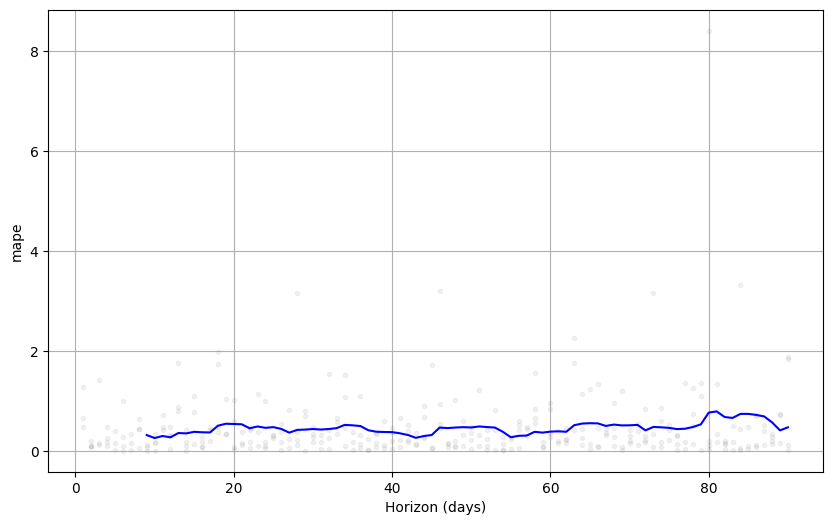

In [32]:
from prophet.plot import plot_cross_validation_metric
#choose between 'mse', 'rmse', 'mae', 'mape', 'coverage'
try:
    plot_cross_validation_metric(df_cv, metric= 'mape')
except TypeError:
    plot_cross_validation_metric(df_cv, metric= 'mdape', rolling_window=0.1)

In [33]:
print(f"MAE: {round(res.mae.median(),3)}")
print(f"RMSE: {round(res.rmse.median(),3)}")
try:
    print(f"MAPE: {round(res.mape.median(),3)}%")
except AttributeError:
    print(f"MDAPE: {round(res.mdape.median(),3)}%")

MAE: 2.712
RMSE: 3.365
MAPE: 0.456%


In [34]:
test_ = predictions[['ds','yhat_lower', 'yhat_upper', 'yhat']]
test_ = test_[test_.ds.isin(test.index)]
test_['y'] = test.values
for i in test_.index:
    lb =test_.loc[i, 'yhat_lower'] -  0.1*(test_.loc[i, 'yhat'])
    ub = test_.loc[i, 'yhat_upper'] + 0.1*(test_.loc[i, 'yhat'])
    if lb <= test_.loc[i, 'y'] <= ub:
        test_.loc[i, 'within_bounds'] = True
    else:
        test_.loc[i, 'within_bounds'] = False
accurate = test_.within_bounds.value_counts()[True]/len(test_)  #percentage of values within bounds
print(f"Percentage of Accurate predictions: {round(accurate, 5)*100}%")

Percentage of Accurate predictions: 79.452%


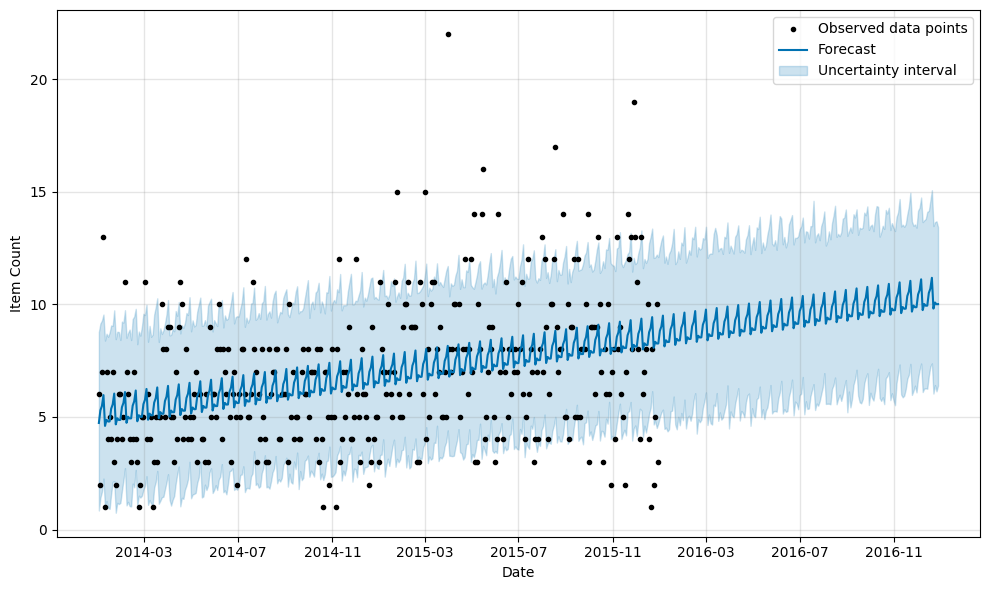

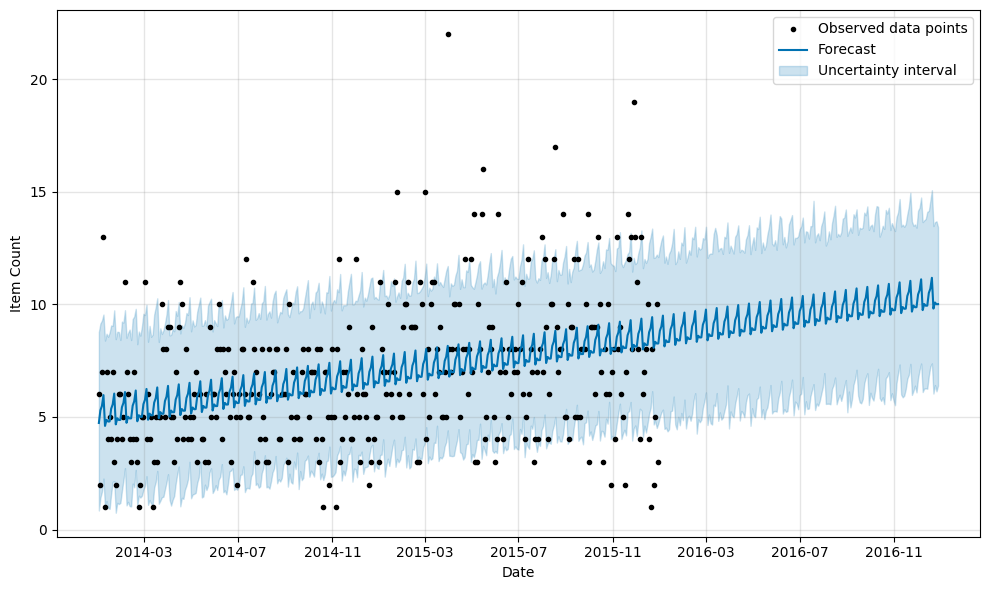

In [35]:
model.plot(predictions, xlabel = 'Date', ylabel = 'Item Count',include_legend=True, )

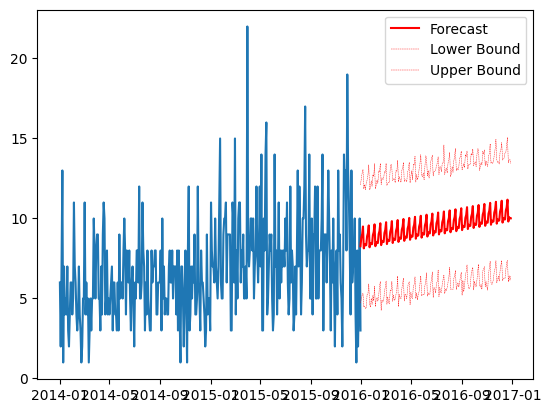

In [36]:
plt.plot(df_resampled)

prophet_forecast = pd.DataFrame(predictions[['yhat','yhat_lower', 'yhat_upper', 'ds']]).set_index('ds', drop=True).tail(num_pred+1)
plt.plot(prophet_forecast.yhat, label='Forecast', color='red')
plt.plot(prophet_forecast.yhat_lower, label='Lower Bound', color='red', linestyle='--', linewidth=0.3)
plt.plot(prophet_forecast.yhat_upper, label='Upper Bound', color='red', linestyle='--', linewidth=0.3)
plt.legend()
plt.show()

In [37]:
model_holidays = Prophet()
model_holidays.add_country_holidays(country_name='IND')
model_holidays.fit(df_item)

future_dates_holidays = model_holidays.make_future_dataframe(periods=num_pred, freq=order_cycle)
# Make predictions
predictions_holidays = model_holidays.predict(future_dates_holidays)

predictions_holidays.tail()

15:09:35 - cmdstanpy - INFO - Chain [1] start processing
15:09:35 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Christmas Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
542,2016-12-20,10.273433,7.268359,15.101346,10.272944,10.273881,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.835872,0.835872,0.835872,0.0,0.0,0.0,11.109305
543,2016-12-22,10.282835,6.320082,13.385716,10.282340,10.283287,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.464580,-0.464580,-0.464580,0.0,0.0,0.0,9.818255
544,2016-12-24,10.292236,6.279109,13.594043,10.291736,10.292693,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.289968,-0.289968,-0.289968,0.0,0.0,0.0,10.002268
545,2016-12-26,10.301637,6.549268,13.604326,10.301132,10.302099,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.306595,-0.306595,-0.306595,0.0,0.0,0.0,9.995042
546,2016-12-28,10.311038,6.251926,13.484646,10.310528,10.311505,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.387213,-0.387213,-0.387213,0.0,0.0,0.0,9.923825


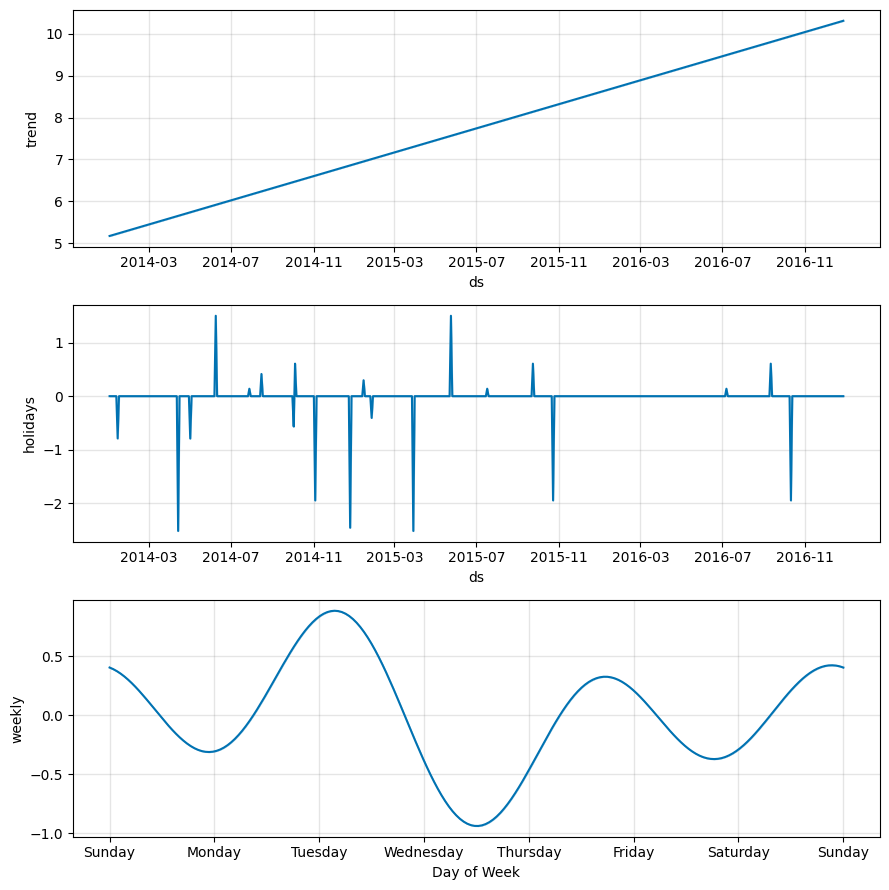

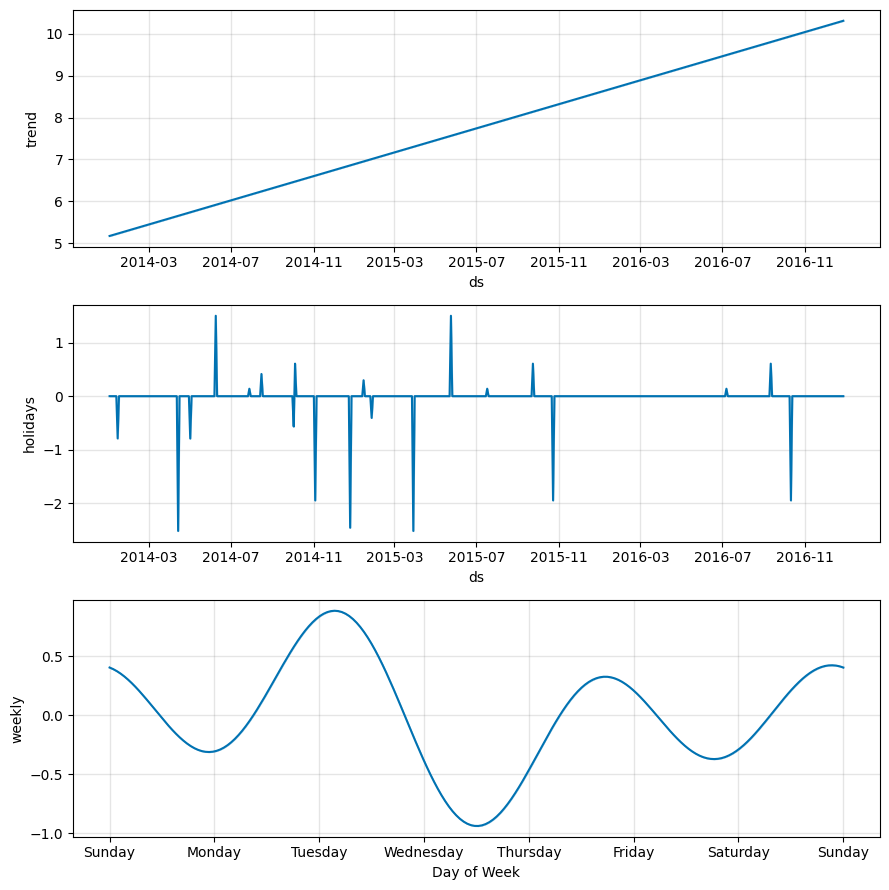

In [38]:
model_holidays.plot_components(predictions_holidays)

In [39]:
df_cv_holidays = cross_validation(model_holidays, initial='365 days', horizon = '90 days')
res_holidays = performance_metrics(df_cv_holidays)
res_holidays

  0%|          | 0/7 [00:00<?, ?it/s]

15:09:37 - cmdstanpy - INFO - Chain [1] start processing
15:09:37 - cmdstanpy - INFO - Chain [1] done processing
15:09:37 - cmdstanpy - INFO - Chain [1] start processing
15:09:38 - cmdstanpy - INFO - Chain [1] done processing
15:09:38 - cmdstanpy - INFO - Chain [1] start processing
15:09:38 - cmdstanpy - INFO - Chain [1] done processing
15:09:38 - cmdstanpy - INFO - Chain [1] start processing
15:09:38 - cmdstanpy - INFO - Chain [1] done processing
15:09:38 - cmdstanpy - INFO - Chain [1] start processing
15:09:38 - cmdstanpy - INFO - Chain [1] done processing
15:09:39 - cmdstanpy - INFO - Chain [1] start processing
15:09:39 - cmdstanpy - INFO - Chain [1] done processing
15:09:39 - cmdstanpy - INFO - Chain [1] start processing
15:09:39 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,7.545508,2.746909,2.076469,0.315671,0.153224,0.274805,0.774194
1,10 days,5.193586,2.278944,1.776105,0.257572,0.148805,0.234906,0.806452
2,11 days,8.286491,2.878627,2.212762,0.298999,0.173281,0.277855,0.709677
3,12 days,8.364210,2.892094,2.230677,0.276628,0.254678,0.270101,0.709677
4,13 days,9.741101,3.121074,2.457190,0.362096,0.295504,0.314252,0.612903
...,...,...,...,...,...,...,...,...
77,86 days,18.045076,4.247950,2.800153,0.719237,0.179311,0.374609,0.661290
78,87 days,19.519503,4.418088,2.892721,0.689613,0.179311,0.368624,0.677419
79,88 days,18.893897,4.346711,2.864066,0.572674,0.192557,0.339183,0.717742
80,89 days,17.861809,4.226323,2.865888,0.409114,0.195072,0.330673,0.709677


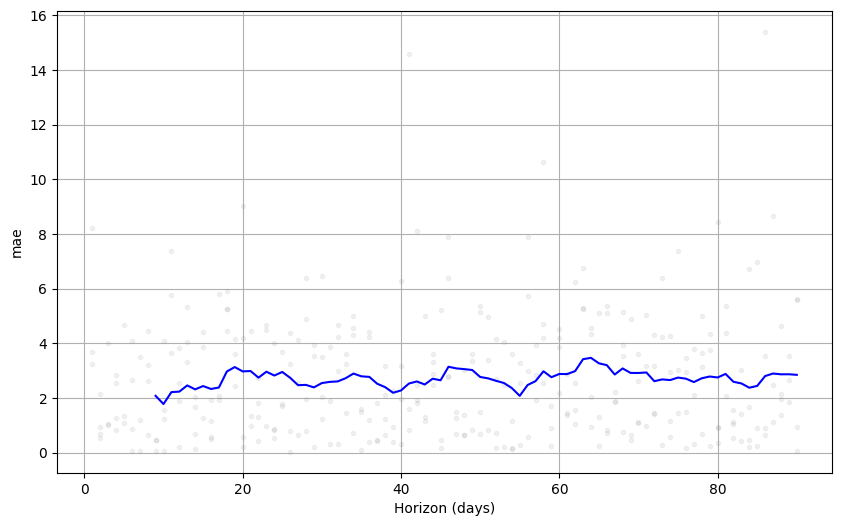

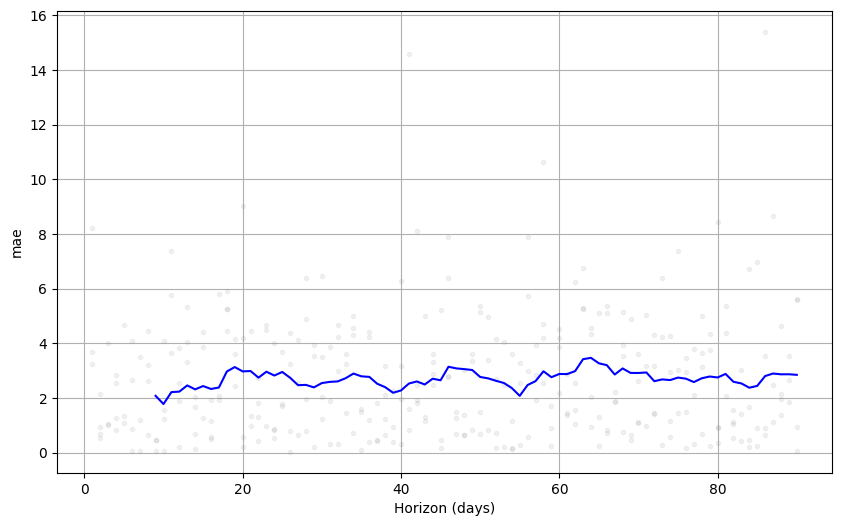

In [40]:
#choose between 'mse', 'rmse', 'mae', 'mape', 'coverage'
plot_cross_validation_metric(df_cv_holidays, metric= 'mae')

In [41]:
print(f"MAE: {round(res_holidays.mae.median(),3)}")
print(f"RMSE: {round(res_holidays.rmse.median(),3)}")
print(f"MAPE: {round(res_holidays.mape.median(),3)}%")

MAE: 2.72
RMSE: 3.382
MAPE: 0.457%


In [42]:
test_ = predictions_holidays[['ds','yhat_lower', 'yhat_upper', 'yhat']]
test_ = test_[test_.ds.isin(test.index)]
test_['y'] = test.values
for i in test_.index:
    lb =test_.loc[i, 'yhat_lower'] -  0.1*(test_.loc[i, 'yhat'])
    ub = test_.loc[i, 'yhat_upper'] + 0.1*(test_.loc[i, 'yhat'])
    if lb <= test_.loc[i, 'y'] <= ub:
        test_.loc[i, 'within_bounds'] = True
    else:
        test_.loc[i, 'within_bounds'] = False
accurate = test_.within_bounds.value_counts()[True]/len(test_)  #percentage of values within bounds
print(f"Percentage of Accurate predictions: {round(accurate, 5)*100}%")

Percentage of Accurate predictions: 79.452%


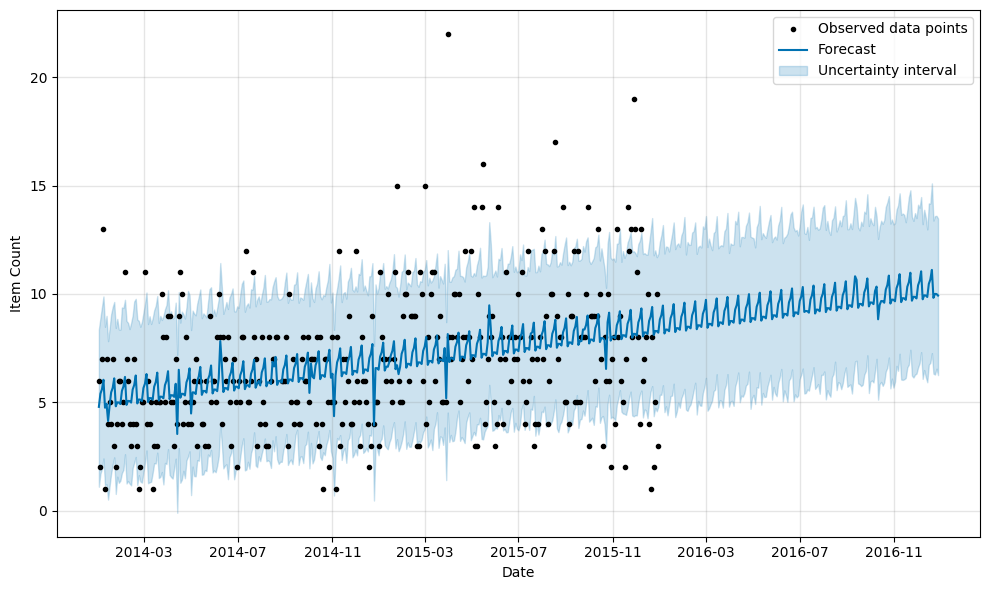

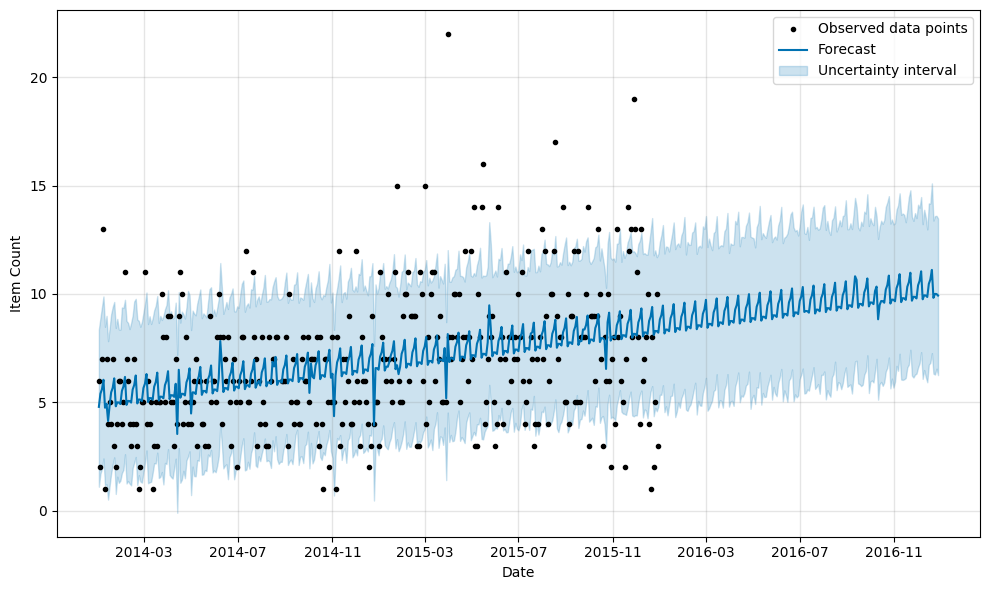

In [43]:
model_holidays.plot(predictions_holidays, xlabel = 'Date', ylabel = 'Item Count',include_legend=True, )

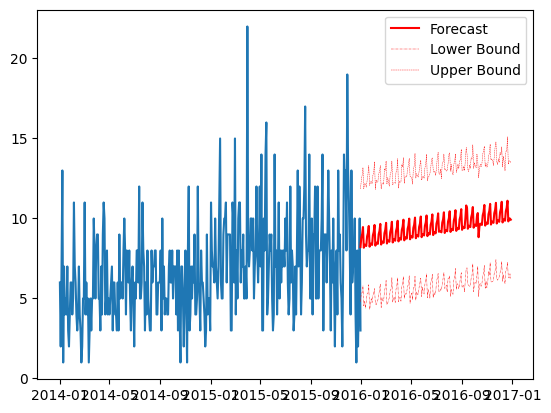

In [44]:
plt.plot(df_resampled)

prophet_forecast = pd.DataFrame(predictions_holidays[['yhat','yhat_lower', 'yhat_upper', 'ds']]).set_index('ds', drop=True).tail(num_pred+1)
plt.plot(prophet_forecast.yhat, label='Forecast', color='red')
plt.plot(prophet_forecast.yhat_lower, label='Lower Bound', color='red', linestyle='-.', linewidth=0.3)
plt.plot(prophet_forecast.yhat_upper, label='Upper Bound', color='red', linestyle='--', linewidth=0.3)
plt.legend()
plt.show()

In [45]:
print("For Holiday (Prophet) vs No Holiday (Prophet)")
print(f"Max Absolute Difference: {round(max(abs(predictions['yhat']-predictions_holidays['yhat'])),3)}")
print(f"Mean Absolute Difference: {round(abs(predictions['yhat']-predictions_holidays['yhat']).mean(),3)}")

For Holiday (Prophet) vs No Holiday (Prophet)
Max Absolute Difference: 2.491
Mean Absolute Difference: 0.08


In [46]:
print("For Prophet (No Holiday) vs AMIMA")
forecast_arima_analysis = (forecast_arima.reset_index().drop(['index'], axis=1)).rename(columns={'predicted_mean':'yhat'})
forecast_prophet_analysis = (prophet_forecast['yhat'].reset_index().drop(['ds'], axis=1))
print(f"Max Absolute Difference: {round((forecast_arima_analysis-forecast_prophet_analysis).fillna(0).abs().max()[0],3)}")
print(f"Mean Absolute Difference: {round((forecast_arima_analysis-forecast_prophet_analysis).fillna(0).abs().mean()[0],3)}")

For Prophet (No Holiday) vs AMIMA
Max Absolute Difference: 3.253
Mean Absolute Difference: 1.115
